In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import shutil
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_7_2/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_7_2/test'

In [8]:
IMG_SIZE = 250
BATCH_SIZE = 32

In [22]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

Found 11000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


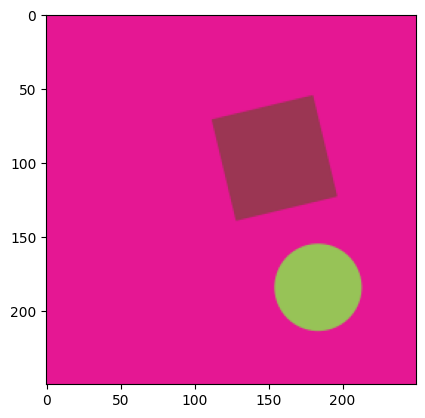

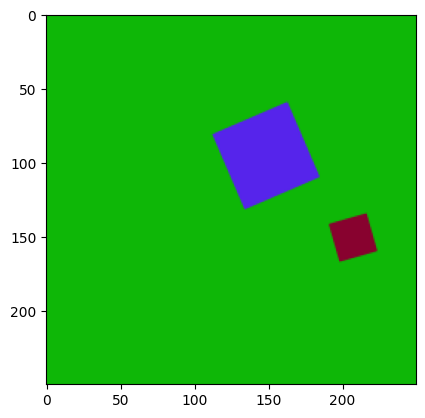

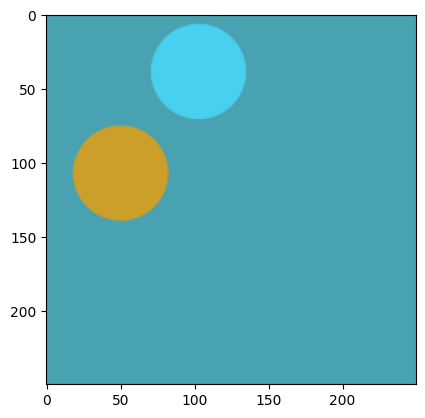

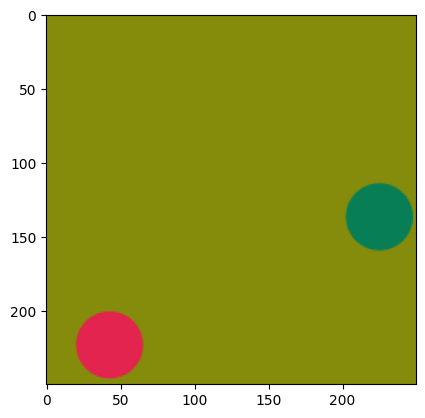

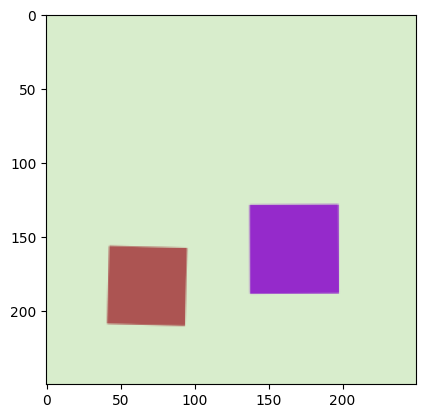

In [23]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [24]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [27]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['acc'])

In [28]:
checkpoint_filepath = 'models/7_2/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)



In [29]:
# Best Epoch = ?
history = model.fit(train_dataset, epochs=35, batch_size=32, validation_data=test_dataset, callbacks=[callbacks,early_stop])

Epoch 1/35


2024-05-07 11:10:07.879478: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-05-07 11:10:08.108004: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-07 11:10:11.026211: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f83ef2314b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-07 11:10:11.026267: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 with Max-Q Design, Compute Capability 6.1
2024-05-07 11:10:11.037837: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1715076611.122854   15599 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


344/344 [==============================] - ETA: 0s - loss: 0.6945 - acc: 0.5198
Epoch 1: val_loss improved from inf to 0.69254, saving model to models/7_2/ch-001.ckpt
INFO:tensorflow:Assets written to: models/7_2/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/7_2/ch-001.ckpt/assets


344/344 [==============================] - 47s 111ms/step - loss: 0.6945 - acc: 0.5198 - val_loss: 0.6925 - val_acc: 0.5146
Epoch 2/35
344/344 [==============================] - ETA: 0s - loss: 0.6528 - acc: 0.6105
Epoch 2: val_loss improved from 0.69254 to 0.61532, saving model to models/7_2/ch-002.ckpt
INFO:tensorflow:Assets written to: models/7_2/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/7_2/ch-002.ckpt/assets


344/344 [==============================] - 36s 103ms/step - loss: 0.6528 - acc: 0.6105 - val_loss: 0.6153 - val_acc: 0.6522
Epoch 3/35
344/344 [==============================] - ETA: 0s - loss: 0.5968 - acc: 0.6588
Epoch 3: val_loss improved from 0.61532 to 0.57456, saving model to models/7_2/ch-003.ckpt
INFO:tensorflow:Assets written to: models/7_2/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/7_2/ch-003.ckpt/assets


344/344 [==============================] - 36s 104ms/step - loss: 0.5968 - acc: 0.6588 - val_loss: 0.5746 - val_acc: 0.6718
Epoch 4/35
344/344 [==============================] - ETA: 0s - loss: 0.5600 - acc: 0.6825
Epoch 4: val_loss improved from 0.57456 to 0.55992, saving model to models/7_2/ch-004.ckpt
INFO:tensorflow:Assets written to: models/7_2/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/7_2/ch-004.ckpt/assets


344/344 [==============================] - 36s 104ms/step - loss: 0.5600 - acc: 0.6825 - val_loss: 0.5599 - val_acc: 0.6928
Epoch 5/35
344/344 [==============================] - ETA: 0s - loss: 0.4578 - acc: 0.7690
Epoch 5: val_loss improved from 0.55992 to 0.36851, saving model to models/7_2/ch-005.ckpt
INFO:tensorflow:Assets written to: models/7_2/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/7_2/ch-005.ckpt/assets


344/344 [==============================] - 36s 103ms/step - loss: 0.4578 - acc: 0.7690 - val_loss: 0.3685 - val_acc: 0.8396
Epoch 6/35
344/344 [==============================] - ETA: 0s - loss: 0.2608 - acc: 0.8909
Epoch 6: val_loss improved from 0.36851 to 0.18663, saving model to models/7_2/ch-006.ckpt
INFO:tensorflow:Assets written to: models/7_2/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/7_2/ch-006.ckpt/assets


344/344 [==============================] - 36s 103ms/step - loss: 0.2608 - acc: 0.8909 - val_loss: 0.1866 - val_acc: 0.9260
Epoch 7/35
344/344 [==============================] - ETA: 0s - loss: 0.1417 - acc: 0.9450
Epoch 7: val_loss improved from 0.18663 to 0.14141, saving model to models/7_2/ch-007.ckpt
INFO:tensorflow:Assets written to: models/7_2/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/7_2/ch-007.ckpt/assets


344/344 [==============================] - 36s 103ms/step - loss: 0.1417 - acc: 0.9450 - val_loss: 0.1414 - val_acc: 0.9458
Epoch 8/35
344/344 [==============================] - ETA: 0s - loss: 0.0868 - acc: 0.9693
Epoch 8: val_loss improved from 0.14141 to 0.09914, saving model to models/7_2/ch-008.ckpt
INFO:tensorflow:Assets written to: models/7_2/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/7_2/ch-008.ckpt/assets


344/344 [==============================] - 36s 103ms/step - loss: 0.0868 - acc: 0.9693 - val_loss: 0.0991 - val_acc: 0.9624
Epoch 9/35
344/344 [==============================] - ETA: 0s - loss: 0.0486 - acc: 0.9839
Epoch 9: val_loss did not improve from 0.09914
344/344 [==============================] - 35s 100ms/step - loss: 0.0486 - acc: 0.9839 - val_loss: 0.1042 - val_acc: 0.9662
Epoch 10/35
344/344 [==============================] - ETA: 0s - loss: 0.0408 - acc: 0.9861
Epoch 10: val_loss improved from 0.09914 to 0.07495, saving model to models/7_2/ch-010.ckpt
INFO:tensorflow:Assets written to: models/7_2/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/7_2/ch-010.ckpt/assets


344/344 [==============================] - 36s 103ms/step - loss: 0.0408 - acc: 0.9861 - val_loss: 0.0749 - val_acc: 0.9754
Epoch 11/35
344/344 [==============================] - ETA: 0s - loss: 0.0279 - acc: 0.9896
Epoch 11: val_loss did not improve from 0.07495
344/344 [==============================] - 35s 100ms/step - loss: 0.0279 - acc: 0.9896 - val_loss: 0.0844 - val_acc: 0.9732
Epoch 12/35
344/344 [==============================] - ETA: 0s - loss: 0.0238 - acc: 0.9916
Epoch 12: val_loss did not improve from 0.07495
344/344 [==============================] - 35s 101ms/step - loss: 0.0238 - acc: 0.9916 - val_loss: 0.0892 - val_acc: 0.9752
Epoch 13/35
344/344 [==============================] - ETA: 0s - loss: 0.0216 - acc: 0.9925
Epoch 13: val_loss did not improve from 0.07495
344/344 [==============================] - 35s 101ms/step - loss: 0.0216 - acc: 0.9925 - val_loss: 0.0828 - val_acc: 0.9750
Epoch 14/35
344/344 [==============================] - ETA: 0s - loss: 0.0178 - acc:

In [ ]:
history2 = model.fit(train_dataset, epochs=35, batch_size=32, validation_data=test_dataset, callbacks=[callbacks,early_stop])

In [30]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=32)
print(val_loss, val_acc)

157/157 [==============================] - 6s 38ms/step - loss: 0.1302 - acc: 0.9720
0.1301819533109665 0.972000002861023


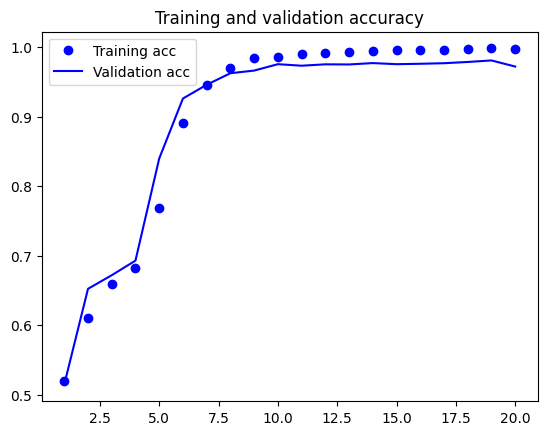

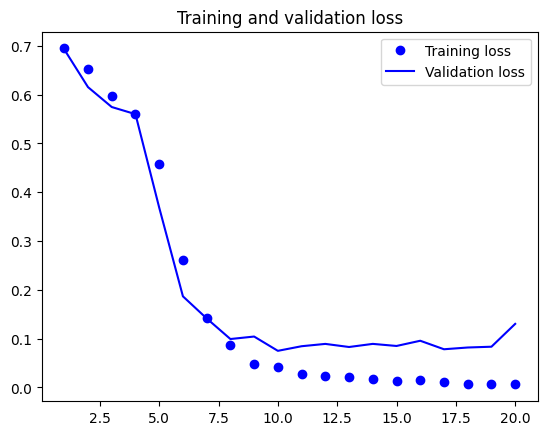

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/7_2/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/7_2/train_test_acc",dpi=100)
plt.show()

In [35]:
# save history data to file
import os
# save data
np.save('history/7_2/acc',acc)
np.save('history/7_2/val_acc',val_acc)
np.save('history/7_2/loss',loss)
np.save('history/7_2/val_loss',val_loss)

In [36]:
model = keras.models.load_model('models/7_2/model.keras')

OSError: No file or directory found at models/7_2/model.keras

In [37]:
model.save('models/7_2/model.keras')

In [38]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

Found 5000 files belonging to 2 classes.
1/1 [==============================] - 0s 24ms/step
5000
0
140


In [39]:
# write the wrong filenames to a file
with open('results/7_2/failed_filenames.txt', 'w') as f:
    for item in wrong_filenames:
        f.write("%s\n" % item)

In [43]:
import csv
import os

output_csv = 'results/7_2/failed_sar_sq.csv'
failed_filenames_txt = 'results/7_2/failed_filenames.txt'
source_file = '../../Dataset_Scripts/Datasets/Dataset_7_2/data/sar_sq.csv'

# Extract short filenames from failed_filenames.txt
failed_filenames = set()
with open(failed_filenames_txt, 'r') as f1:
    for line in f1:
        filename = os.path.basename(line.strip())  # Get short filename
        failed_filenames.add(filename)

# Open output CSV file for writing
out = open(output_csv, 'w', newline='')
out_writer = csv.writer(out)

# Iterate over rows in squares.csv
with open(source_file, 'r') as f:
    reader = csv.DictReader(f)
    # Write header to output CSV
    out_writer.writerow(reader.fieldnames)
    # Iterate over rows
    for row in reader:
        # Extract filename from the current row
        filename = os.path.basename(row['Filename'])
        # Check if filename is in the set of failed filenames
        if filename in failed_filenames:
            # Write the row to the output CSV
            out_writer.writerow(row.values())

# Close output CSV file
out.close()

In [44]:
import shutil
output_folder = 'results/7_2/failed_images'
file_name = 'results/7_2/failed_filenames.txt'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

with open(file_name, 'r') as file:
    lines = file.readlines()

for line in lines:
    line = line.strip()
    if os.path.exists(line):
        filename = os.path.basename(line)
        shutil.copy(line, os.path.join(output_folder, filename))
    else:
        print(f"Image path '{line}' does not exist.")